In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Basic packages always been used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data scaling
from sklearn.preprocessing import MinMaxScaler

# Function for spilting training & testing data set
from sklearn.model_selection import train_test_split

# Tensorflow sequential models
from tensorflow import keras
from keras import backend as clear
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam

# Functions for evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix

In [3]:
#載入檔案
df = pd.read_csv('/content/drive/MyDrive/Titanic_assignment_data_25.csv')
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,26.0,0,0,7.8958,S,yes
1,1,male,49.0,0,0,0.0000,S,no
2,2,female,25.0,0,1,26.0000,S,yes
3,2,male,30.0,0,0,12.7375,C,no
4,3,male,NaN,8,2,69.5500,S,no
...,...,...,...,...,...,...,...,...
1042,2,male,19.0,1,1,36.7500,S,no
1043,2,male,25.0,0,0,13.0000,S,no
1044,3,female,19.0,1,0,7.8542,S,yes
1045,3,female,18.0,0,0,7.2292,C,yes


In [4]:
#列出基本資訊
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1047 non-null   int64  
 1   Sex       1047 non-null   object 
 2   Age       796 non-null    float64
 3   SibSp     1047 non-null   int64  
 4   Parch     1047 non-null   int64  
 5   Fare      1046 non-null   float64
 6   Embarked  1047 non-null   object 
 7   Survived  1047 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 65.6+ KB


In [5]:
df[['Pclass']]=df[['Pclass']].astype(str) #轉換pclass為字串
df.info() #列出資訊

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1047 non-null   object 
 1   Sex       1047 non-null   object 
 2   Age       796 non-null    float64
 3   SibSp     1047 non-null   int64  
 4   Parch     1047 non-null   int64  
 5   Fare      1046 non-null   float64
 6   Embarked  1047 non-null   object 
 7   Survived  1047 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 65.6+ KB


In [6]:
df.describe(include='all') #列出所有欄位之統計訊息

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,1047,1047,796.000000,1047.000000,1047.000000,1046.000000,1047,1047
unique,3,2,NaN,NaN,NaN,NaN,3,2
top,3,male,NaN,NaN,NaN,NaN,S,no
freq,561,669,NaN,NaN,NaN,NaN,736,656
mean,NaN,NaN,29.698492,0.498567,0.388730,33.379461,NaN,NaN
std,NaN,NaN,14.254367,1.014120,0.884748,49.879526,NaN,NaN
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,21.000000,0.000000,0.000000,7.895800,NaN,NaN
50%,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,NaN,NaN,39.000000,1.000000,0.000000,31.387500,NaN,NaN


In [21]:
print(df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(df[['Survived']].value_counts(sort=True))

Pclass
3         561
1         266
2         220
dtype: int64
+-----------------------+
Sex   
male      669
female    378
dtype: int64
+-----------------------+
Embarked
S           736
C           214
Q            97
dtype: int64
+-----------------------+
Survived
no          656
yes         391
dtype: int64


In [18]:
new_df=df.dropna(axis=0, how='any') #刪除欄位有缺失值的列
new_df #刪除過缺失值的資料表

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,26.0,0,0,7.8958,S,yes
1,1,male,49.0,0,0,0.0000,S,no
2,2,female,25.0,0,1,26.0000,S,yes
3,2,male,30.0,0,0,12.7375,C,no
8,1,male,17.0,0,0,47.1000,S,no
...,...,...,...,...,...,...,...,...
1042,2,male,19.0,1,1,36.7500,S,no
1043,2,male,25.0,0,0,13.0000,S,no
1044,3,female,19.0,1,0,7.8542,S,yes
1045,3,female,18.0,0,0,7.2292,C,yes


In [24]:
new_df.describe(include='all') #列出所有欄位之統計訊息

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,796,796,796.000000,796.000000,796.000000,796.000000,796,796
unique,3,2,NaN,NaN,NaN,NaN,3,2
top,3,male,NaN,NaN,NaN,NaN,S,no
freq,368,490,NaN,NaN,NaN,NaN,603,478
mean,NaN,NaN,29.698492,0.512563,0.413317,37.521294,NaN,NaN
std,NaN,NaN,14.254367,0.897848,0.843039,54.047149,NaN,NaN
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,21.000000,0.000000,0.000000,8.050000,NaN,NaN
50%,NaN,NaN,28.000000,0.000000,0.000000,16.100000,NaN,NaN
75%,NaN,NaN,39.000000,1.000000,1.000000,39.400000,NaN,NaN


In [25]:
print(new_df[['Pclass']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Sex']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Embarked']].value_counts(sort=True))
print('+-----------------------+')
print(new_df[['Survived']].value_counts(sort=True))

Pclass
3         368
1         230
2         198
dtype: int64
+-----------------------+
Sex   
male      490
female    306
dtype: int64
+-----------------------+
Embarked
S           603
C           159
Q            34
dtype: int64
+-----------------------+
Survived
no          478
yes         318
dtype: int64


In [8]:
new_df.info() #檢查有無缺失值或異常資料

<class 'pandas.core.frame.DataFrame'>
Int64Index: 796 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    796 non-null    object 
 1   Sex       796 non-null    object 
 2   Age       796 non-null    float64
 3   SibSp     796 non-null    int64  
 4   Parch     796 non-null    int64  
 5   Fare      796 non-null    float64
 6   Embarked  796 non-null    object 
 7   Survived  796 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 56.0+ KB


In [9]:
dummied_new_df=pd.get_dummies(new_df,columns=['Pclass','Sex','Embarked','Survived']) #將分類變數轉成虛擬變數
dummied_new_df #列出虛擬變數資料表

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,26.0,0,0,7.8958,0,0,1,0,1,0,0,1,0,1
1,49.0,0,0,0.0000,1,0,0,0,1,0,0,1,1,0
2,25.0,0,1,26.0000,0,1,0,1,0,0,0,1,0,1
3,30.0,0,0,12.7375,0,1,0,0,1,1,0,0,1,0
8,17.0,0,0,47.1000,1,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,19.0,1,1,36.7500,0,1,0,0,1,0,0,1,1,0
1043,25.0,0,0,13.0000,0,1,0,0,1,0,0,1,1,0
1044,19.0,1,0,7.8542,0,0,1,1,0,0,0,1,0,1
1045,18.0,0,0,7.2292,0,0,1,1,0,1,0,0,0,1


In [10]:
MMscaler=MinMaxScaler(feature_range=(0, 1)) #使用MinMaxScaler將特徵縮放至[0,1]
scaling=MMscaler.fit_transform(dummied_new_df)
scaled_data=pd.DataFrame(data=scaling)
scaled_data.columns=['Age','SibsSp','Parch','Fare','Pclass_1','Pclass_2','Pclass_3','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S','Survived_no','Survived_yes']
scaled_data #產生一個特徵縮放過的資料表

,Age,SibsSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived_no,Survived_yes
0,0.342466,0.0,0.000000,0.015412,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.657534,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.328767,0.0,0.166667,0.050749,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.397260,0.0,0.000000,0.024862,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.219178,0.0,0.000000,0.091933,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,0.246575,0.2,0.166667,0.071731,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
792,0.328767,0.0,0.000000,0.025374,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
793,0.246575,0.2,0.000000,0.015330,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
794,0.232877,0.0,0.000000,0.014110,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [11]:
x=scaled_data.drop(['Survived_no','Survived_yes'],axis=1).copy() # x為模型的輸入變數，值為除了'Survived_no'和'Survived_yes'的所有變數
y=scaled_data['Survived_yes'].copy() # y為模型的輸出變數，值為'Survived_yes'
y=y.astype(int) #將'Survived_yes'轉換為整數

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4) #將資料分為訓練集和測試集(80%:20%),random_state數固定隨機種子，以確保每次執行結果一致
# x_train和y_train分別為訓練集的特徵和目標變數，x_test和y_test分別為測試集的特徵和目標變數
from collections import Counter
print('y_train:',Counter(y_train)) #印出y_train中每個元素出現的次數
print('------------------------------------')
print('y_test :',Counter(y_test)) #印出y_test中每個元素出現的次數

y_train: Counter({0: 385, 1: 251})
------------------------------------
y_test : Counter({0: 93, 1: 67})


In [88]:
input_features=x.shape[1]
print('Amount of features:',input_features)

# 建立神經網路模型
clear.clear_session()
model=Sequential()

# 加入輸入層和第一個隱藏層
model.add(Dense(units=24, input_dim=12, activation='relu'))

# 加入第二個隱藏層
model.add(Dense(units=48, activation='relu'))

# 加入輸出層
model.add(Dense(units=1, activation='sigmoid'))

# SGD = 最佳化函數
opt=SGD(learning_rate=0.008,momentum=0.8)
#opt=Adam(learning_rate=0.001,beta_1=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
 
model.summary()

Amount of features: 12
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                312       
                                                                 
 dense_1 (Dense)             (None, 48)                1200      
                                                                 
 dense_2 (Dense)             (None, 1)                 49        
                                                                 
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [89]:
x_training,x_validation,y_training,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=55)

history=model.fit(x_training, y_training, epochs=100, batch_size=64,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/100
8/8 [==============================] - 1s 34ms/step - loss: 0.6765 - accuracy: 0.6476 - val_loss: 0.6691 - val_accuracy: 0.6484
Epoch 2/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6640 - accuracy: 0.6417 - val_loss: 0.6587 - val_accuracy: 0.7109
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6523 - accuracy: 0.6516 - val_loss: 0.6517 - val_accuracy: 0.6875
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6436 - accuracy: 0.6476 - val_loss: 0.6461 - val_accuracy: 0.6484
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.6364 - accuracy: 0.6535 - val_loss: 0.6416 - val_accuracy: 0.6406
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.6310 - accuracy: 0.6358 - val_loss: 0.6380 - val_accuracy: 0.6094
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.6260 - accuracy: 0.6417 - val_loss: 0.6345 - val_accuracy: 0.6641
Epoch 8/100
8/8 [=========

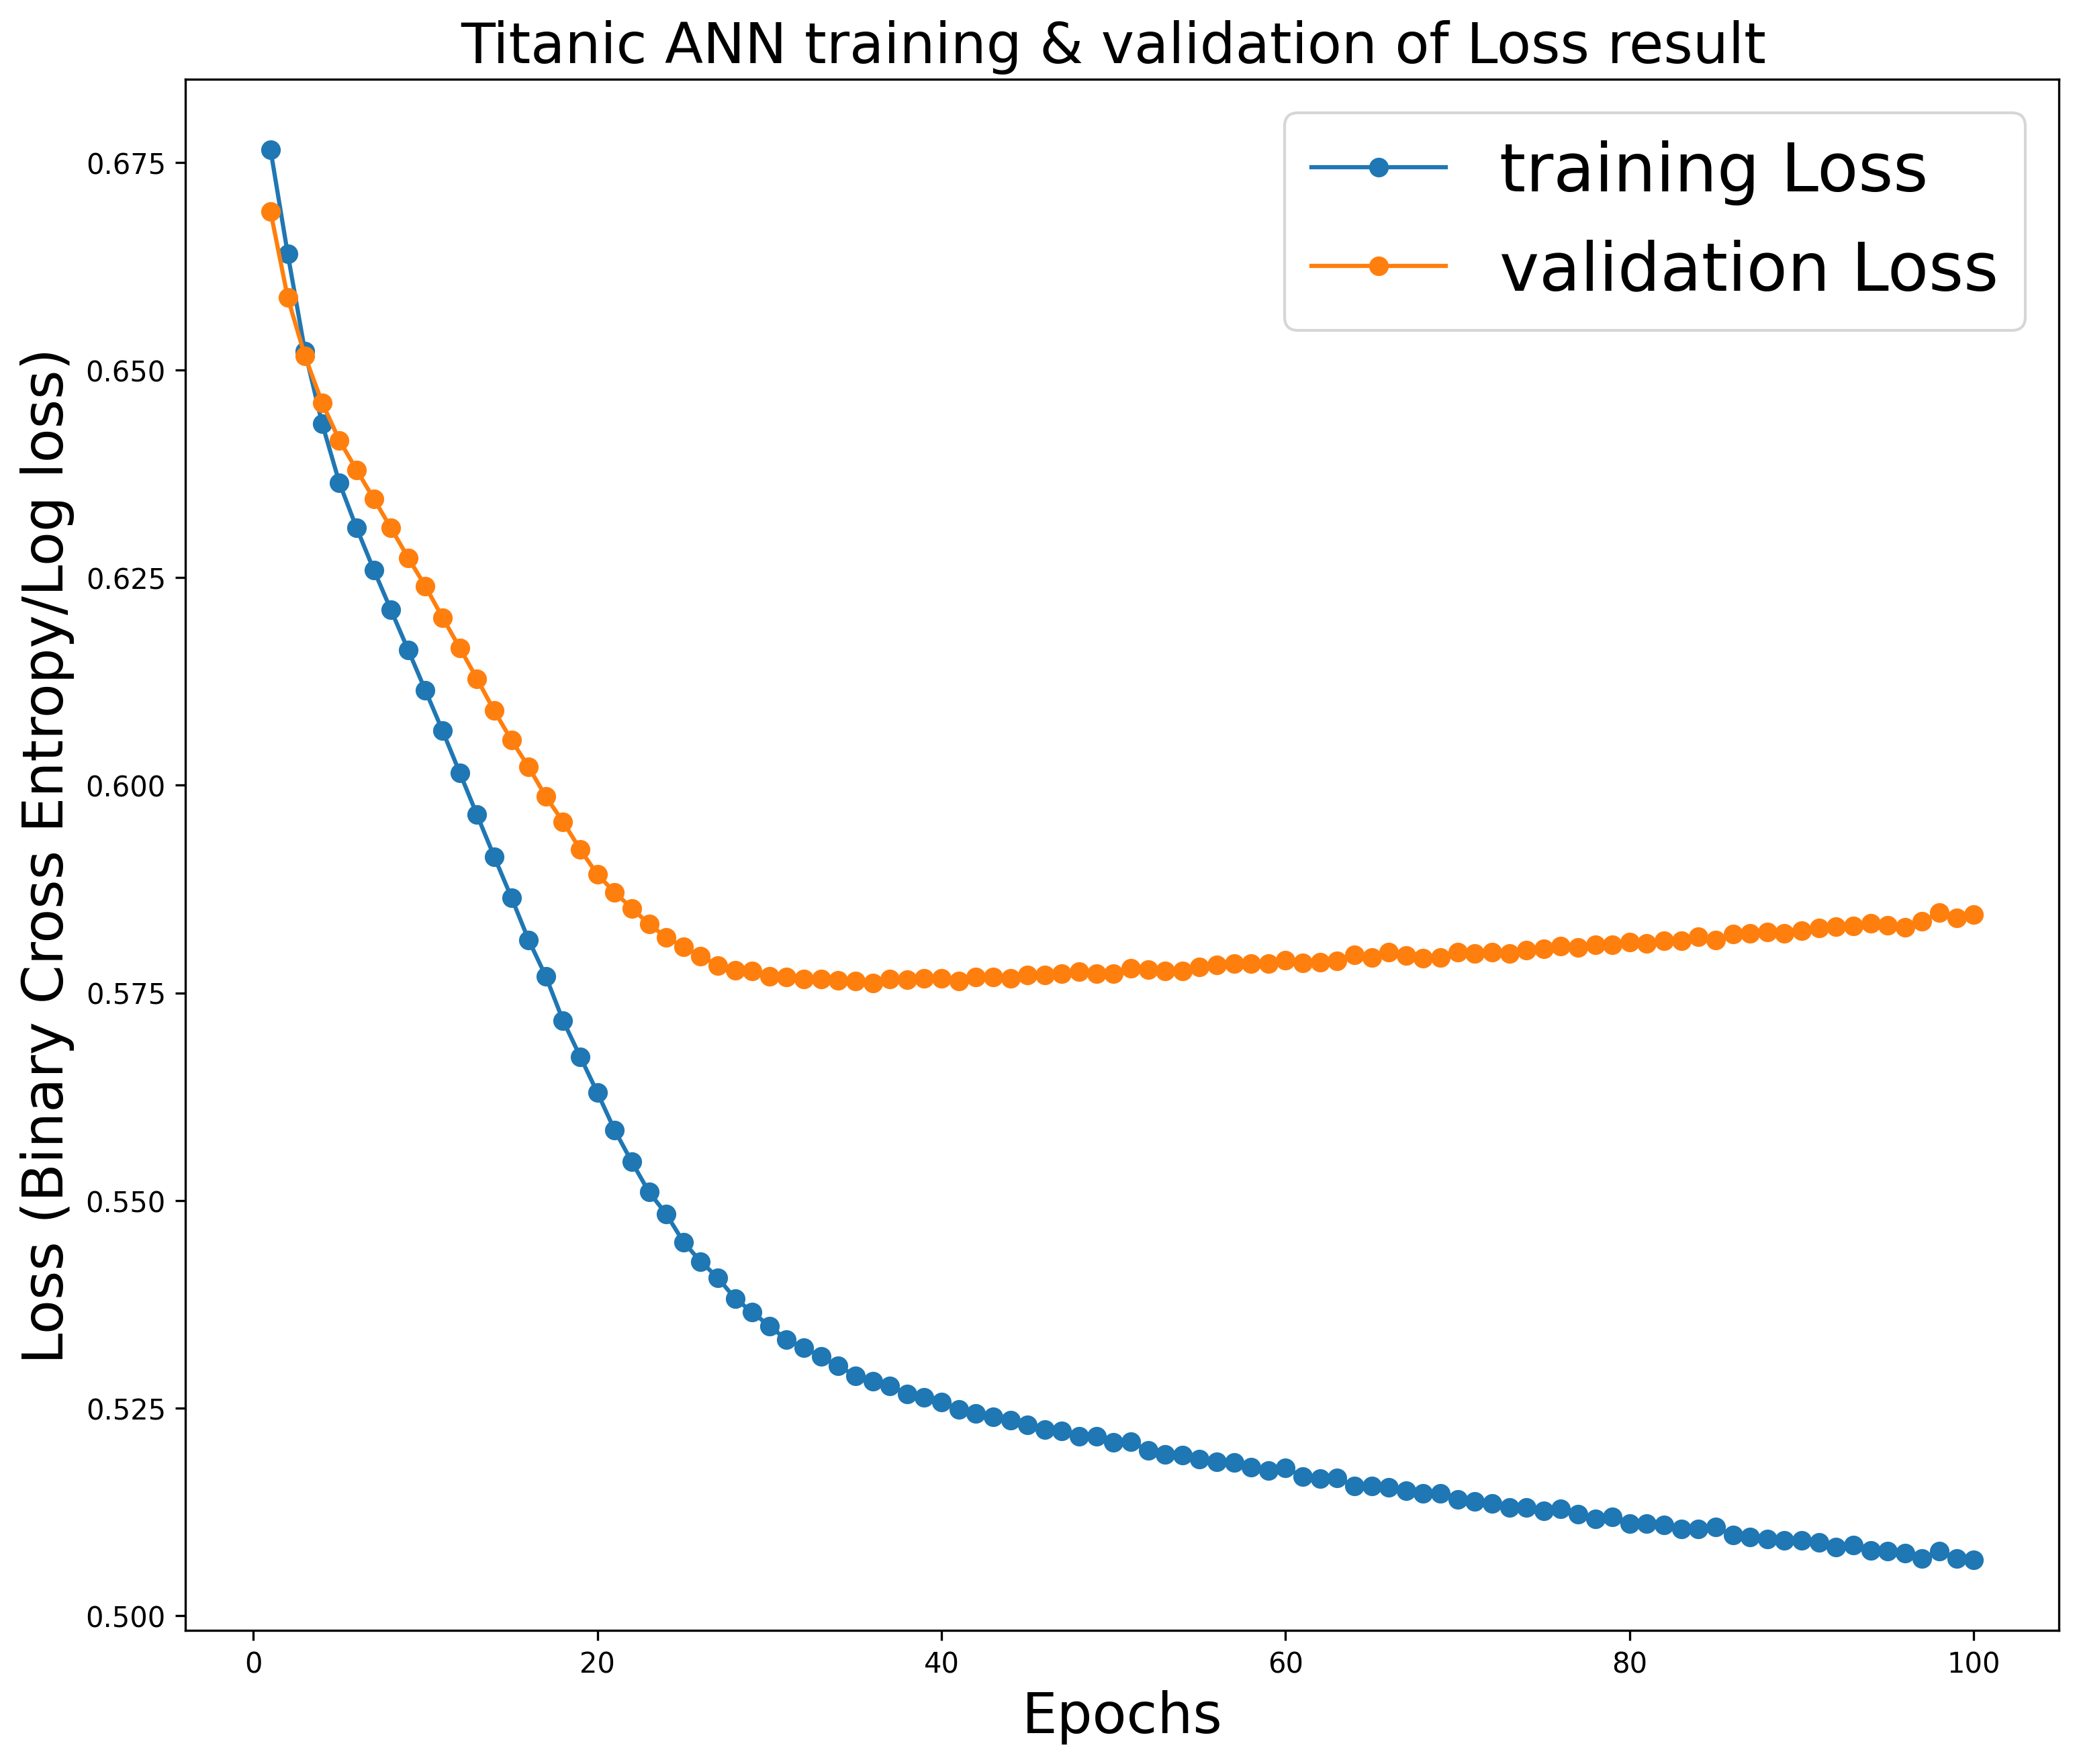

In [90]:
# Check the dictionary keys
modeling_result=history.history
modeling_result.keys()

# 7.2 Plot the history of training and validation
training_loss_values=modeling_result['loss']
val_loss_values=modeling_result['val_loss']
epochs=range(1,len(training_loss_values)+1)

plt.figure(figsize=(12,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Loss (Binary Cross Entropy/Log loss)',fontsize=20)
plt.title('Titanic ANN training & validation of Loss result ',fontsize=20)

plt.plot(epochs, training_loss_values,marker='o',label='training Loss')
plt.plot(epochs, val_loss_values,marker='o',label='validation Loss')
plt.legend(loc=1,fontsize=24)
plt.show()

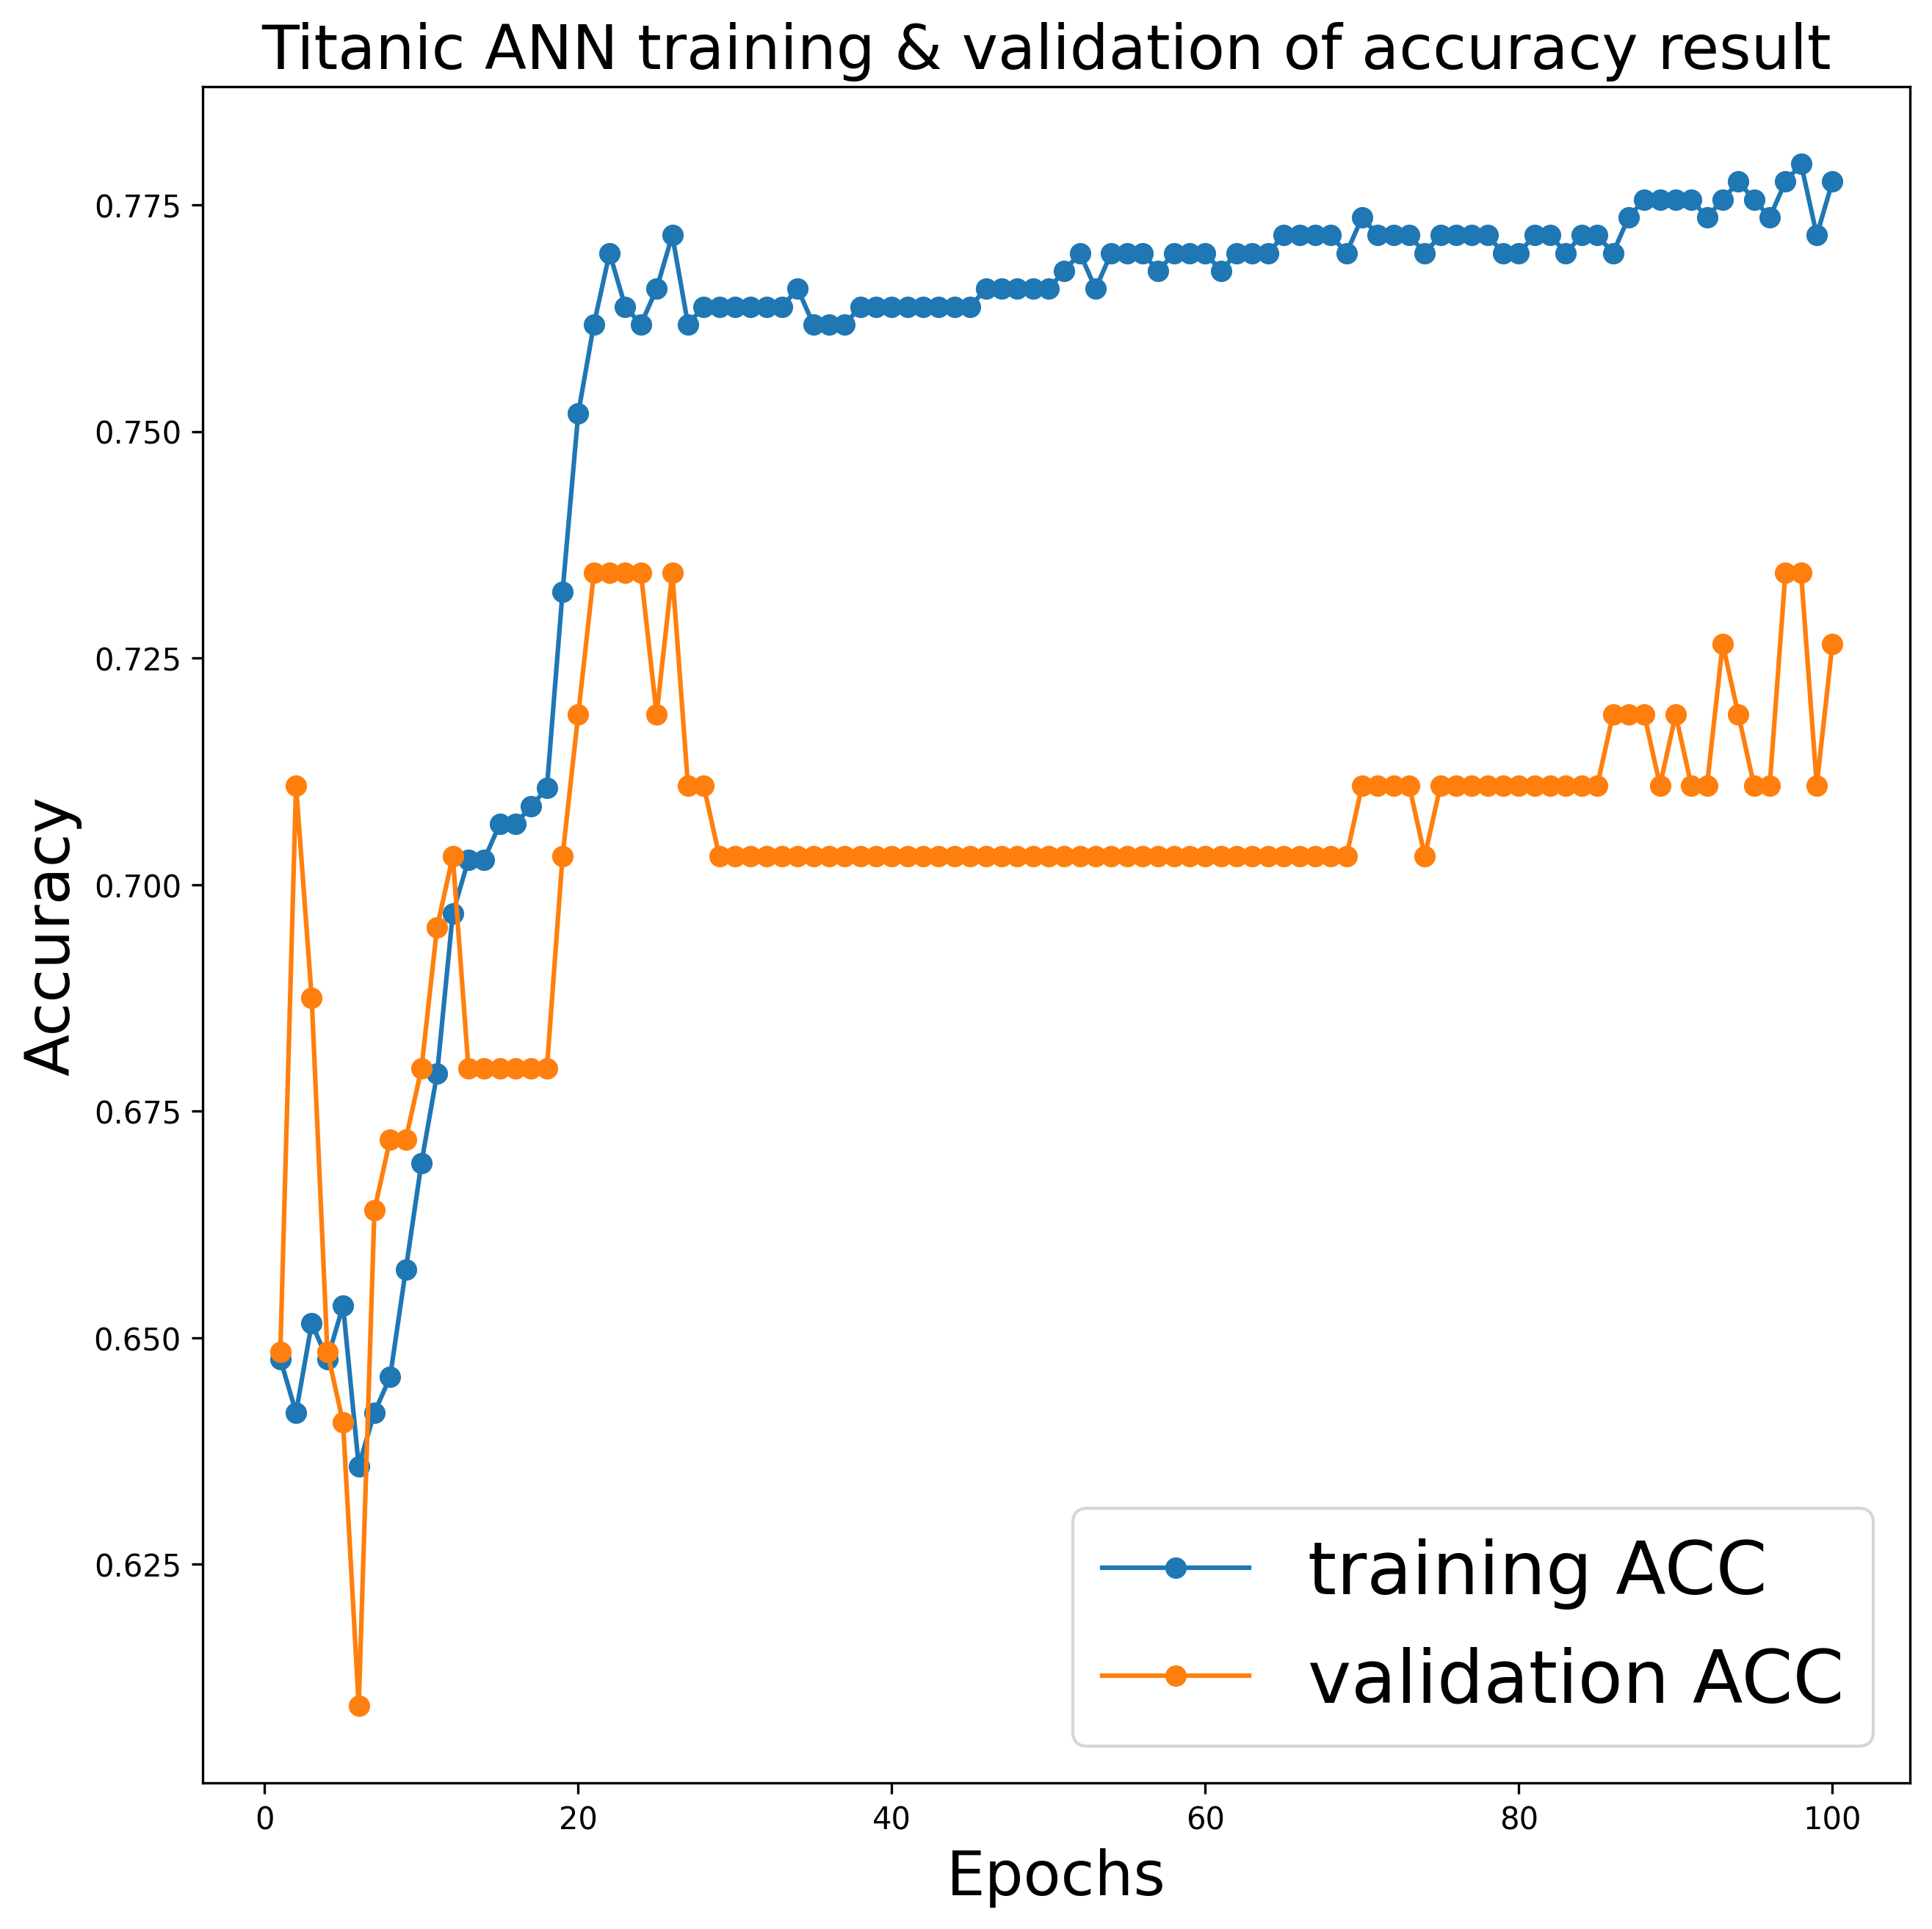

In [91]:
# 7.2 Plot the history of training and validation
training_acc_values=modeling_result['accuracy']
val_acc_values=modeling_result['val_accuracy']
epochs=range(1,len(training_acc_values)+1)

plt.figure(figsize=(10,10),dpi=300)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Titanic ANN training & validation of accuracy result ',fontsize=20)

plt.plot(epochs, training_acc_values,marker='o',label='training ACC')
plt.plot(epochs, val_acc_values,marker='o',label='validation ACC')
plt.legend(loc=4,fontsize=24)
plt.show()